# **Final Project: Comparing CO2 emissions between China and OECD countries**

The Organization for Economic Co-operation and Development (OECD) is a unique forum where the governments of 37 democracies with market-based economies collaborate to develop policy standards to promote sustainable economic growth.
In this project we want to compare China's and the OECD's CO2 emission development from 1990-2020.

We start our project with the main focus, visualization in different versions, and conclude with hypothesis testing on linear regression slopes.

# Part 1: Visualization

**Part 1.1: Comparing CO2 emissions**

We start by setting up the notebook with all needed imports.

In [1]:
!pip install datascience

In [2]:
from datascience import *
import urllib.request
import json
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from scipy import stats

We now need a function to generate the data series of the selected countries from the [World Bank website](https://databank.worldbank.org/home).

In [3]:
def generate_data_series(country_code, indicator_name):
    base_url = "https://api.worldbank.org/v2/country/{}/indicator/{}?format=json".format(country_code, indicator_name)
    response = urllib.request.urlopen(base_url)
    data = json.loads(response.read().decode())
    series_data = data[1]
    data_series = [[entry["date"], entry["value"]] for entry in series_data]
    return data_series

The following cell generates all data series for the countries CO2 emissions in kilo tons.

In [4]:
series_austria = generate_data_series('AUT', 'EN.ATM.CO2E.KT')
series_australia = generate_data_series('AUS', 'EN.ATM.CO2E.KT')
series_belgium = generate_data_series('BEL', 'EN.ATM.CO2E.KT')
series_canada = generate_data_series('CAN', 'EN.ATM.CO2E.KT')
series_chile = generate_data_series('CHL', 'EN.ATM.CO2E.KT')
series_china = generate_data_series('CHN', 'EN.ATM.CO2E.KT')
series_czech_republic = generate_data_series('CZE', 'EN.ATM.CO2E.KT')
series_denmark = generate_data_series('DNK', 'EN.ATM.CO2E.KT')
series_estonia = generate_data_series('EST', 'EN.ATM.CO2E.KT')
series_finland = generate_data_series('FIN', 'EN.ATM.CO2E.KT')
series_france = generate_data_series('FRA', 'EN.ATM.CO2E.KT')
series_germany = generate_data_series('DEU', 'EN.ATM.CO2E.KT')
series_greece = generate_data_series('GRC', 'EN.ATM.CO2E.KT')
series_hungary = generate_data_series('HUN', 'EN.ATM.CO2E.KT')
series_iceland = generate_data_series('ISL', 'EN.ATM.CO2E.KT')
series_ireland = generate_data_series('IRL', 'EN.ATM.CO2E.KT')
series_israel = generate_data_series('ISR', 'EN.ATM.CO2E.KT')
series_italy = generate_data_series('ITA', 'EN.ATM.CO2E.KT')
series_japan = generate_data_series('JPN', 'EN.ATM.CO2E.KT')
series_korea = generate_data_series('KOR', 'EN.ATM.CO2E.KT')
series_latvia = generate_data_series('LVA', 'EN.ATM.CO2E.KT')
series_lithuania = generate_data_series('LTU', 'EN.ATM.CO2E.KT')
series_luxembourg = generate_data_series('LUX', 'EN.ATM.CO2E.KT')
series_mexico = generate_data_series('MEX', 'EN.ATM.CO2E.KT')
series_netherlands = generate_data_series('NLD', 'EN.ATM.CO2E.KT')
series_new_zealand = generate_data_series('NZL', 'EN.ATM.CO2E.KT')
series_norway = generate_data_series('NOR', 'EN.ATM.CO2E.KT')
series_poland = generate_data_series('POL', 'EN.ATM.CO2E.KT')
series_portugal = generate_data_series('PRT', 'EN.ATM.CO2E.KT')
series_slovakia = generate_data_series('SVK', 'EN.ATM.CO2E.KT')
series_slovenia = generate_data_series('SVN', 'EN.ATM.CO2E.KT')
series_spain = generate_data_series('ESP', 'EN.ATM.CO2E.KT')
series_sweden = generate_data_series('SWE', 'EN.ATM.CO2E.KT')
series_switzerland = generate_data_series('CHE', 'EN.ATM.CO2E.KT')
series_turkey = generate_data_series('TUR', 'EN.ATM.CO2E.KT')
series_united_kingdom = generate_data_series('GBR', 'EN.ATM.CO2E.KT')
series_united_states = generate_data_series('USA', 'EN.ATM.CO2E.KT')
series_oecd = generate_data_series('OED', 'EN.ATM.CO2E.KT')

Before we go on to the visualization, we need to get rid of the null (not available) values in the data set.

In [5]:
series_austria_non_null = [entry for entry in series_austria if entry[1] is not None]
series_australia_non_null = [entry for entry in series_australia if entry[1] is not None]
series_belgium_non_null = [entry for entry in series_belgium if entry[1] is not None]
series_canada_non_null = [entry for entry in series_canada if entry[1] is not None]
series_chile_non_null = [entry for entry in series_chile if entry[1] is not None]
series_china_non_null = [entry for entry in series_china if entry[1] is not None] # China
series_czech_republic_non_null = [entry for entry in series_czech_republic if entry[1] is not None]
series_denmark_non_null = [entry for entry in series_denmark if entry[1] is not None]
series_estonia_non_null = [entry for entry in series_estonia if entry[1] is not None]
series_finland_non_null = [entry for entry in series_finland if entry[1] is not None]
series_france_non_null = [entry for entry in series_france if entry[1] is not None]
series_germany_non_null = [entry for entry in series_germany if entry[1] is not None]
series_greece_non_null = [entry for entry in series_greece if entry[1] is not None]
series_hungary_non_null = [entry for entry in series_hungary if entry[1] is not None]
series_iceland_non_null = [entry for entry in series_iceland if entry[1] is not None]
series_ireland_non_null = [entry for entry in series_ireland if entry[1] is not None]
series_israel_non_null = [entry for entry in series_israel if entry[1] is not None]
series_italy_non_null = [entry for entry in series_italy if entry[1] is not None]
series_japan_non_null = [entry for entry in series_japan if entry[1] is not None]
series_korea_non_null = [entry for entry in series_korea if entry[1] is not None]
series_latvia_non_null = [entry for entry in series_latvia if entry[1] is not None]
series_lithuania_non_null = [entry for entry in series_lithuania if entry[1] is not None]
series_luxembourg_non_null = [entry for entry in series_luxembourg if entry[1] is not None]
series_mexico_non_null = [entry for entry in series_mexico if entry[1] is not None]
series_netherlands_non_null = [entry for entry in series_netherlands if entry[1] is not None]
series_new_zealand_non_null = [entry for entry in series_new_zealand if entry[1] is not None]
series_norway_non_null = [entry for entry in series_norway if entry[1] is not None]
series_poland_non_null = [entry for entry in series_poland if entry[1] is not None]
series_portugal_non_null = [entry for entry in series_portugal if entry[1] is not None]
series_slovakia_non_null = [entry for entry in series_slovakia if entry[1] is not None]
series_slovenia_non_null = [entry for entry in series_slovenia if entry[1] is not None]
series_spain_non_null = [entry for entry in series_spain if entry[1] is not None]
series_sweden_non_null = [entry for entry in series_sweden if entry[1] is not None]
series_switzerland_non_null = [entry for entry in series_switzerland if entry[1] is not None]
series_turkey_non_null = [entry for entry in series_turkey if entry[1] is not None]
series_united_kingdom_non_null = [entry for entry in series_united_kingdom if entry[1] is not None]
series_united_states_non_null = [entry for entry in series_united_states if entry[1] is not None]
series_oecd_non_null = [entry for entry in series_oecd if entry[1] is not None]

The following collects all data (without null values), sorts them according to the year, and plots a line for each country's CO2 emissions (in KT) on the graph. The legend with the country codes is represented on the left of the graph.

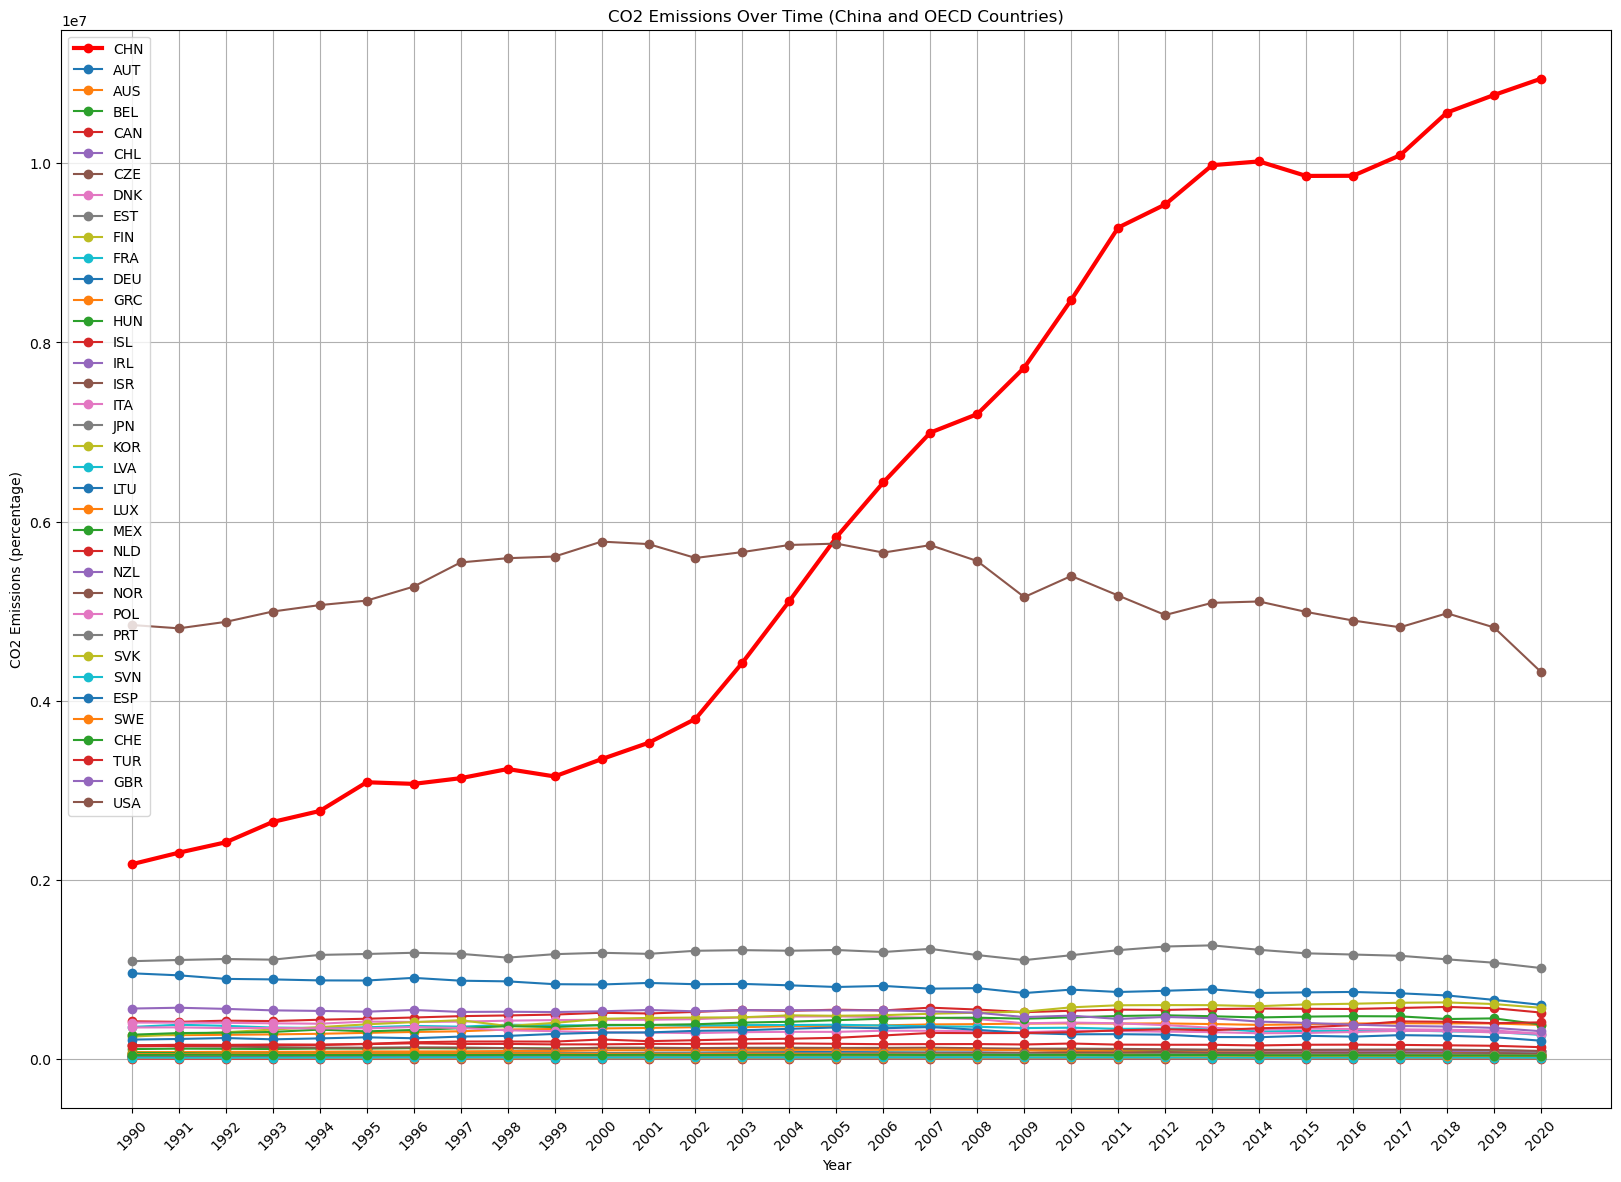

In [6]:
series_dict = {
    'CHN': series_china_non_null,
    'AUT': series_austria_non_null,
    'AUS': series_australia_non_null,
    'BEL': series_belgium_non_null,
    'CAN': series_canada_non_null,
    'CHL': series_chile_non_null,
    'CZE': series_czech_republic_non_null,
    'DNK': series_denmark_non_null,
    'EST': series_estonia_non_null,
    'FIN': series_finland_non_null,
    'FRA': series_france_non_null,
    'DEU': series_germany_non_null,
    'GRC': series_greece_non_null,
    'HUN': series_hungary_non_null,
    'ISL': series_iceland_non_null,
    'IRL': series_ireland_non_null,
    'ISR': series_israel_non_null,
    'ITA': series_italy_non_null,
    'JPN': series_japan_non_null,
    'KOR': series_korea_non_null,
    'LVA': series_latvia_non_null,
    'LTU': series_lithuania_non_null,
    'LUX': series_luxembourg_non_null,
    'MEX': series_mexico_non_null,
    'NLD': series_netherlands_non_null,
    'NZL': series_new_zealand_non_null,
    'NOR': series_norway_non_null,
    'POL': series_poland_non_null,
    'PRT': series_portugal_non_null,
    'SVK': series_slovakia_non_null,
    'SVN': series_slovenia_non_null,
    'ESP': series_spain_non_null,
    'SWE': series_sweden_non_null,
    'CHE': series_switzerland_non_null,
    'TUR': series_turkey_non_null,
    'GBR': series_united_kingdom_non_null,
    'USA': series_united_states_non_null
}

# Sort data by year for each series
for code, series in series_dict.items():
    series.sort(key = lambda x: int(x[0]))

# Adjust the figure size of the line graph
plt.figure(figsize = (20, 14))

# Ploting data for each country
for code, series in series_dict.items():
    years = [entry[0] for entry in series]
    values = [entry[1] for entry in series]
    if code == 'CHN':
        plt.plot(years, values, label = code, color = 'red', marker = 'o', linewidth = 3)
    else:
        plt.plot(years, values, label = code, marker = 'o')

plt.xlabel('Year')
plt.ylabel('CO2 Emissions (percentage)')
plt.title('CO2 Emissions Over Time (China and OECD Countries)')
plt.xticks(rotation = 45)
plt.grid(True)
plt.legend(loc = 'upper left')
plt.show()

The graph above already shows the huge difference in CO2 emission developments from 1990-2020 in China compared to the OECD countries. As the OECD countries kept its annual CO2 emissions rather constant or increased slightly (with USA being constantly higher than all other ones), China's emissions increased rapidly and the country is the biggest issuer since 2005.

But let's see how China's CO2 emissions developed over the years compared to the OECD countries.

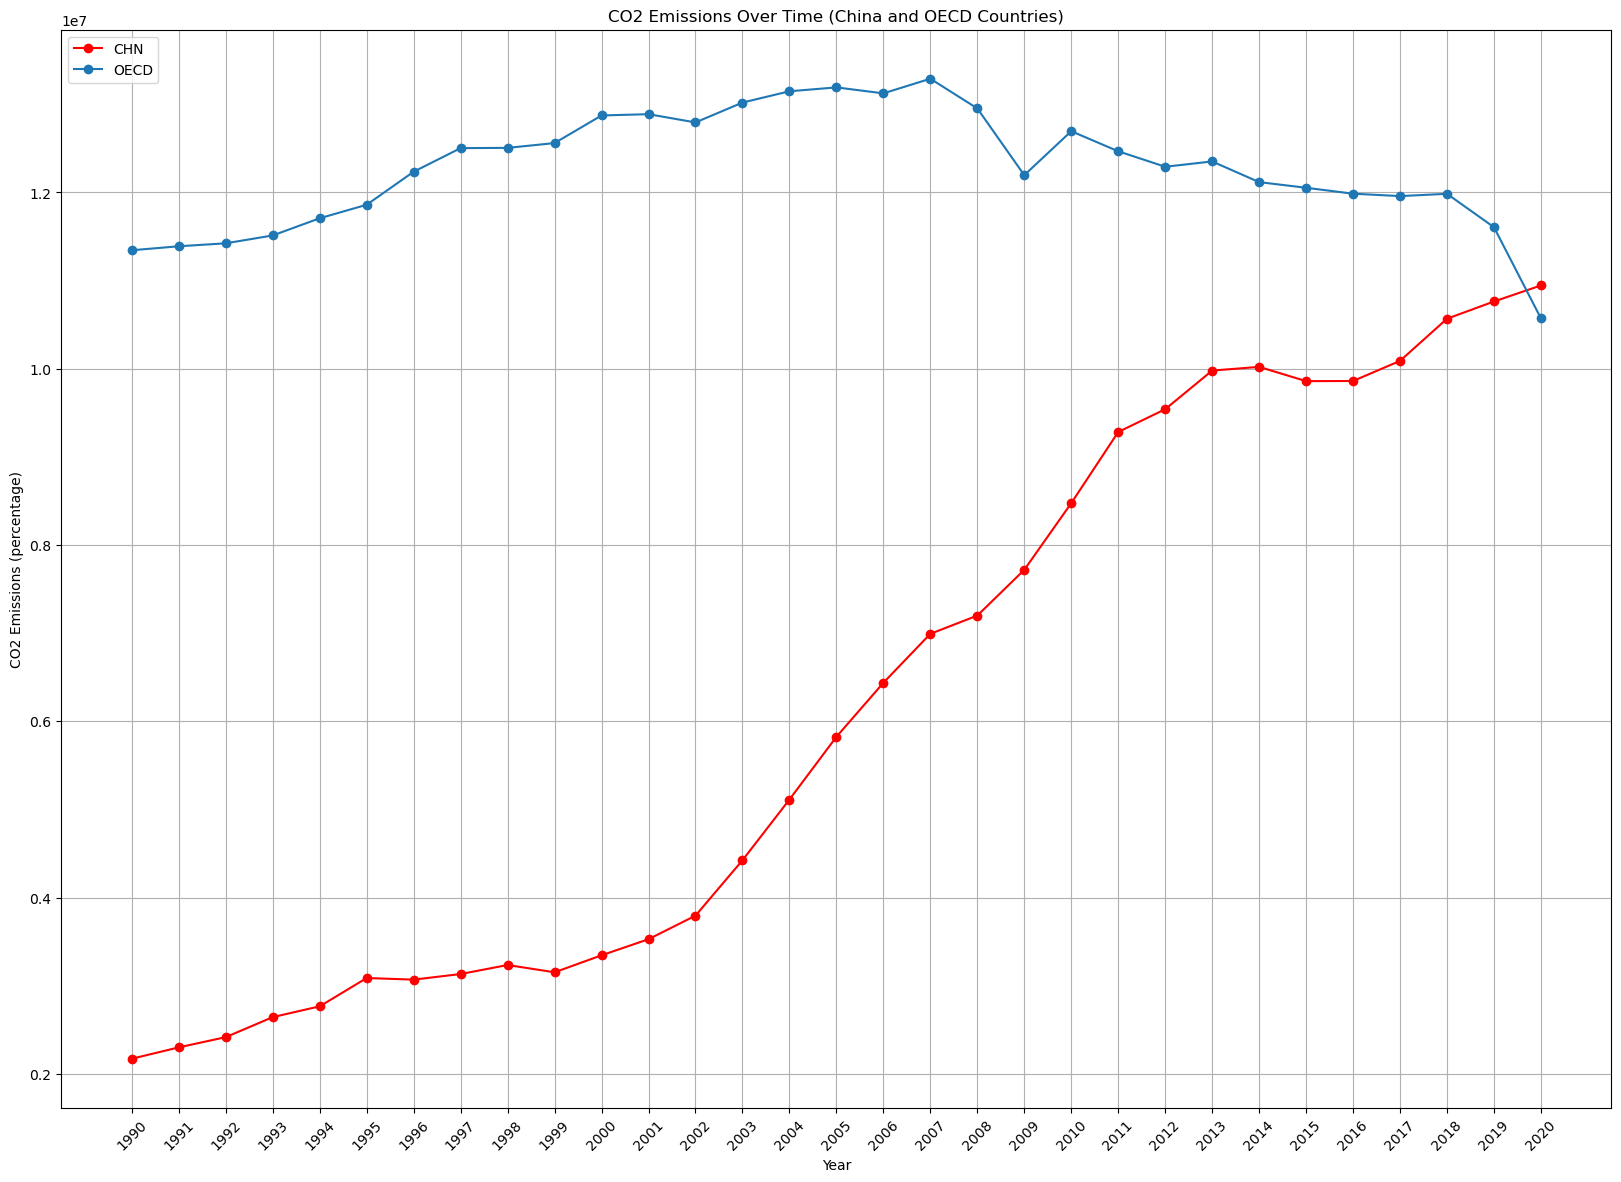

In [7]:
series_dict = {
    'CHN': series_china_non_null,
    'OECD': series_oecd_non_null
}

# Sort data by year for each series
for code, series in series_dict.items():
    series.sort(key = lambda x: int(x[0]))

# Adjust the figure size of the line graph
plt.figure(figsize = (20, 14))

# Ploting data for each country
for code, series in series_dict.items():
    years = [entry[0] for entry in series]
    values = [entry[1] for entry in series]
    if code == 'CHN':
        plt.plot(years, values, label = code, color = 'red', marker = 'o')
    else:
        plt.plot(years, values, label = code, marker = 'o')

plt.xlabel('Year')
plt.ylabel('CO2 Emissions (percentage)')
plt.title('CO2 Emissions Over Time (China and OECD Countries)')
plt.xticks(rotation = 45)
plt.grid(True)
plt.legend(loc = 'upper left')
plt.show()

The graph above shows something really special. China’s emissions not only eclipsed that of the US — the world’s second-largest emitter at 11% of the global total — (as shown in the graph before) but also, for the first time, surpassed the emissions of all OECD countries combined in 2019.

To get an even better impression of the different developments from 1990-2020, the following cell uses an indexed graph will all countries CO2 emissions with the first year as a base year.

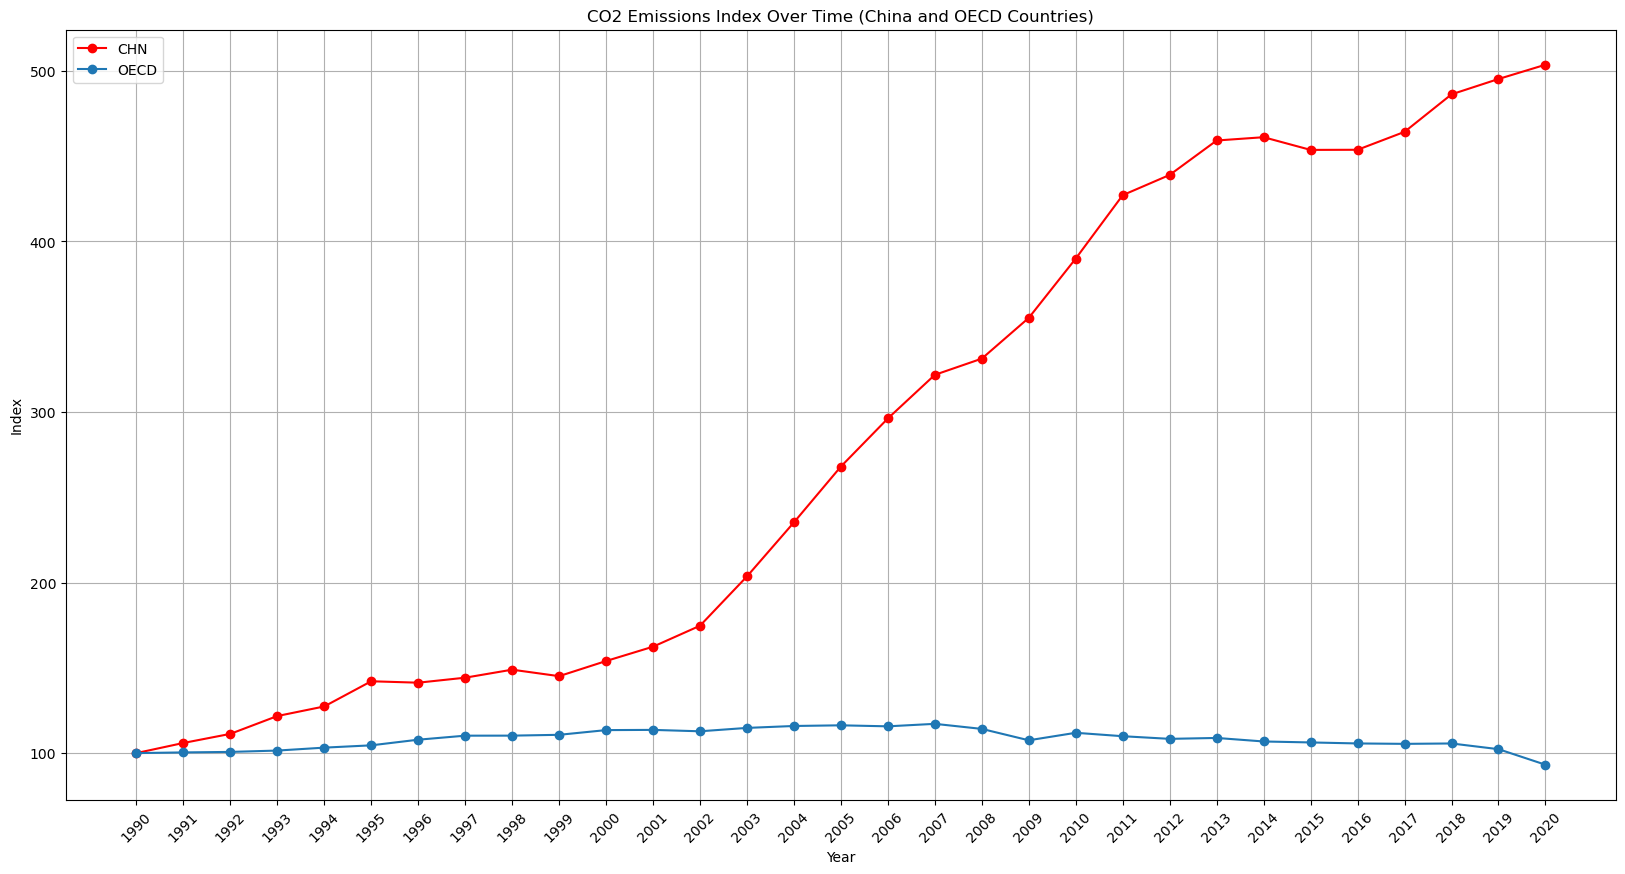

In [8]:
# Index calculation
def calculate_index(data_series):
    base_value = data_series[0][1]
    index = [(entry[0], (entry[1] / base_value) * 100) for entry in data_series]
    return index

# Calculation of indices for China and each OECD country
index_dict = {code: calculate_index(series) for code, series in series_dict.items()}

# Adjust the figure size of the line graph
plt.figure(figsize = (20, 10))

# Ploting data for each country
for code, index_series in index_dict.items():
    years, index_values = zip(*index_series)
    if code == 'CHN':
        plt.plot(years, index_values, label=code, marker='o', color='red')
    else:
        plt.plot(years, index_values, label=code, marker='o')

plt.ylabel('Index')
plt.xlabel('Year')
plt.title('CO2 Emissions Index Over Time (China and OECD Countries)')
plt.xticks(rotation = 45)
plt.grid(True)
plt.legend(loc = 'upper left')
plt.show()

The indexed graph above illustrates a significant contrast of China's CO2 emissions Compared to those of OECD countries from 1990 to 2020. It is evident that China holds the distinction of having the highest CO2 emissions globally. The primary contributors to this surge are predominantly linked to coal-related activities, encompassing coal-fired power stations, coal mining operations, and the operation of blast furnaces for iron and steel production.

**Part 1.2: Comparing CO2 emissions and GDP (USD) of China and OECD countries**

We will now take a closer look at comparing CO2 emissions and GDP (in current USD) of China and OECD countries.
The code cell below retrieves the needed data on GDP and CO2 emissions for the year 2020 for China and OECD countries from the World Bank into a table called data_table.

In [9]:
china_and_oecd_countries = {
    "China": "CHN",
    "Australia": "AUS",
    "Austria": "AUT",
    "Belgium": "BEL",
    "Canada": "CAN",
    "Chile": "CHL",
    "Colombia": "COL",
    "Czech Republic": "CZE",
    "Denmark": "DNK",
    "Estonia": "EST",
    "Finland": "FIN",
    "France": "FRA",
    "Germany": "DEU",
    "Greece": "GRC",
    "Hungary": "HUN",
    "Iceland": "ISL",
    "Ireland": "IRL",
    "Israel": "ISR",
    "Italy": "ITA",
    "Japan": "JPN",
    "Korea": "KOR",
    "Latvia": "LVA",
    "Lithuania": "LTU",
    "Luxembourg": "LUX",
    "Mexico": "MEX",
    "Netherlands": "NLD",
    "New Zealand": "NZL",
    "Norway": "NOR",
    "Poland": "POL",
    "Portugal": "PRT",
    "Slovakia": "SVK",
    "Slovenia": "SVN",
    "Spain": "ESP",
    "Sweden": "SWE",
    "Switzerland": "CHE",
    "Turkey": "TUR",
    "United Kingdom": "GBR",
    "United States": "USA",
}

def get_indicator_for_2020(country_code, indicator_name):
    indicator_series = generate_data_series(country_code, indicator_name)
    value_for_2020 = None
    for entry in indicator_series:
        if entry[0] == '2020' and entry[1] is not None:
            value_for_2020 = entry[1]
            break
    return (country_code, value_for_2020)

gdp_dict = {}
co2_emissions_dict = {}

# Get data for each country
for country, country_code in china_and_oecd_countries.items():
    gdp_value = get_indicator_for_2020(country_code, 'NY.GDP.MKTP.CD')
    co2_emissions_value = get_indicator_for_2020(country_code, 'EN.ATM.CO2E.KT')
    if gdp_value[1] is not None and co2_emissions_value[1] is not None:
        gdp_dict[country] = gdp_value[1]
        co2_emissions_dict[country] = co2_emissions_value[1]
        
country_data_series = [(country, gdp_dict[country], co2_emissions_dict[country]) for country in china_and_oecd_countries]

countries = [entry[0] for entry in country_data_series]
gdp_values = [entry[1] for entry in country_data_series]
co2_emissions_values = [entry[2] for entry in country_data_series]

data_table = Table().with_columns("Country", countries, "GDP (USD)", gdp_values, "CO2 Emissions (KT)", co2_emissions_values).sort("CO2 Emissions (KT)", descending = True)
data_table

Country,GDP (USD),CO2 Emissions (KT)
China,1.46877e+13,1.09447e+07
United States,2.10605e+13,4.32053e+06
Japan,5.04879e+12,1.01406e+06
Germany,3.88967e+12,603350
Korea,1.64431e+12,569682
Canada,1.6476e+12,516874
Turkey,7.20289e+11,407406
Mexico,1.09051e+12,383131
Australia,1.32694e+12,378997
United Kingdom,2.70461e+12,308650


Now we generate a scatter plot comparing CO2 emissions and GDP for the year 2020, with each point representing an OECD country or China.

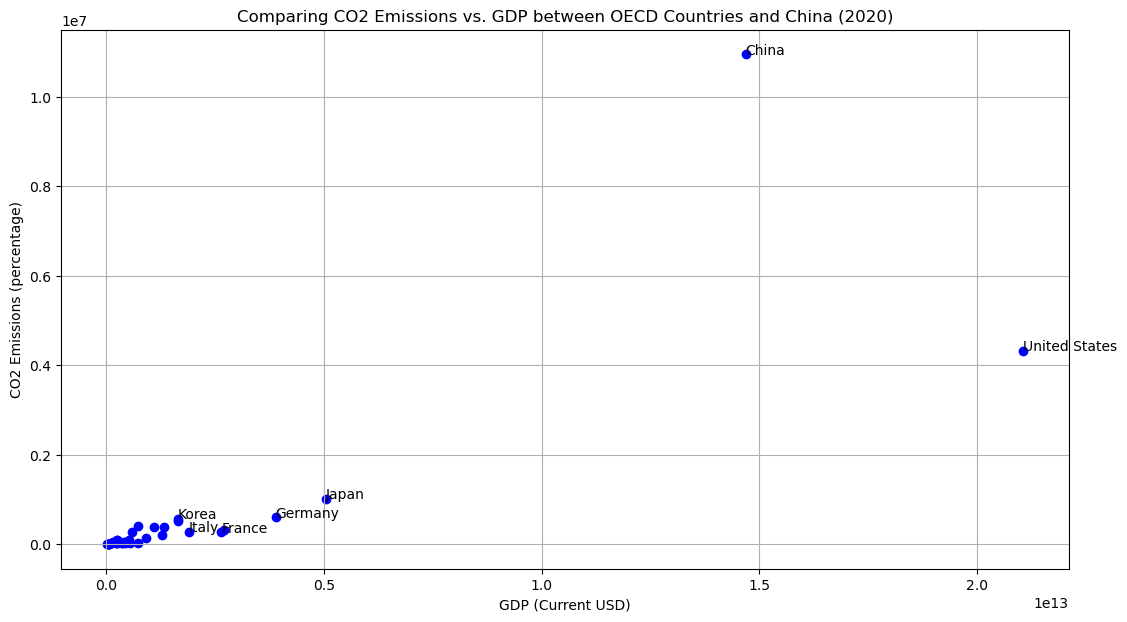

In [10]:
gdp = data_table.column("GDP (USD)")
co2_emissions = data_table.column("CO2 Emissions (KT)")
countries = data_table.column("Country")

plt.figure(figsize = (13, 7))
plt.scatter(gdp, co2_emissions, marker = 'o', color = 'blue')

# Country nnotations
for i, text in enumerate(countries):
    if text in {"China", "United States", "Japan", "Germany", "France", "Italy", "Korea"}:
        plt.annotate(text, (gdp[i], co2_emissions[i]), fontsize = 10)

plt.title('Comparing CO2 Emissions vs. GDP between OECD Countries and China (2020)')
plt.xlabel('GDP (Current USD)')
plt.ylabel('CO2 Emissions (percentage)')
plt.grid(True)
plt.show()

As most OECD countries are really close to each other, it is unfortunately not possible to identify every point on the scatter plot above individually because of the way Jupyter would show the plot. However, the main takeaway from the plot is that China has the highest CO2 emissions by far but the United States have an even higher GDP compared to China. There is a slight trend of higher GDP resulting in higher CO2 emissions but China is an extreme outlier with not the highest GDP but by far the highest CO2 emissions.

# Part 2: Statistical Analysis (Linear Regression)

In order to statistically analyze the trends in CO2 emissions from 1990 to 2020 between China and the OECD countries, we start by defining the null hypothesis, alternative hypothesis, and test statistic below.

- Null hypothesis: The slopes of the Linear regression lines for CO2 emissions trends (1990-2020) in China and the OECD countries are equal.
- Alternative hypothesis: The slope of the Linear regression line for CO2 emissions trend (1990-2020) in China is greater than the slope for the OECD countries.
- Test statistic: The difference in slopes between the Linear regression lines for CO2 emissions trends (1990-2020) in China and the OECD countries.

We start by creating a table called china_oecd_data which includes annual emissions from 1990 - 2020 for China and OECD.

In [11]:
china_oecd_data = Table().with_columns("Year", np.arange(1990, 2021), "China", [entry[1] for entry in series_china_non_null], "OECD", [entry[1] for entry in series_oecd_non_null])
china_oecd_data

Year,China,OECD
1990,2.17336e+06,1.13441e+07
1991,2.30219e+06,1.13891e+07
1992,2.41818e+06,1.14227e+07
1993,2.64541e+06,1.15119e+07
1994,2.76767e+06,1.1707e+07
1995,3.08862e+06,1.186e+07
1996,3.07051e+06,1.22349e+07
1997,3.13411e+06,1.25025e+07
1998,3.23628e+06,1.25052e+07
1999,3.15366e+06,1.25597e+07


China starts of way lower at 1990 but is higher in 2020.

We can see the development in the small scatter plot below.

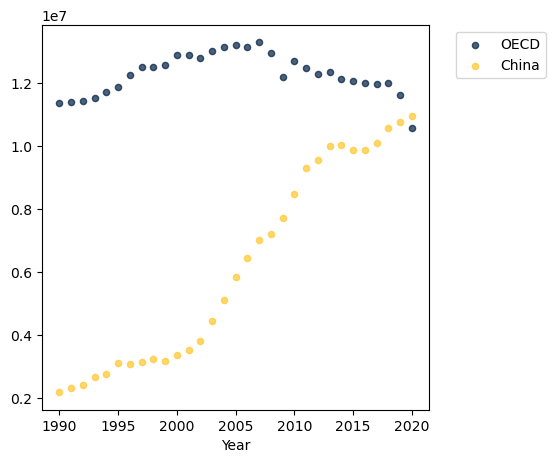

In [12]:
china_oecd_data.scatter("Year",["OECD", "China"])

We will now perform a linear regression to statistically compare the CO2 emission trends between China and the OECD countries from 1990 to 2020. The following cell computes the regression slopes for the standardized data of both China and the OECD countries.

In [13]:
def standard_units(data):
    return (data - np.mean(data)) / np.std(data)

def correlation(x, y):
    return np.mean(standard_units(x) * standard_units(y))

def parameter_estimates(tbl):
    x = standard_units(tbl.column("Year"))
    y = standard_units(tbl.column("CO2"))

    r = correlation(x, y)
    slope = r * np.std(y) / np.std(x)
    intercept = np.mean(y) - slope * np.mean(x)

    return make_array(r, slope, intercept)

# China
china_data = china_oecd_data.select("Year", "China").relabeled("China", "CO2")
china_parameters = parameter_estimates(china_data)

print("China slope:", china_parameters[1])

# OECD
oecd_data = china_oecd_data.select("Year", "OECD").relabeled("OECD", "CO2")
oecd_parameters = parameter_estimates(oecd_data)

print("OECD slope:", oecd_parameters[1])

China slope: 0.974398169661
OECD slope: 0.0115944672875


Now we can see the difference in slopes (which are both unfortunately really low).
Lastly, we want to test our data to find out the p value for either rejecting or failing to reject the null hypothesis (that the slopes are simliar). 

In [18]:
# Running this cell might take a few seconds
def bootstrap_slope_difference(tbl_china, tbl_oecd, repetitions):
    observed_difference = parameter_estimates(tbl_china).item(1) - parameter_estimates(tbl_oecd).item(1)
    differences = make_array()
    for i in range(repetitions):
        combined_table = tbl_china.append(tbl_oecd)
        bootstrap_sample = combined_table.sample(with_replacement = True)
        china_bootstrap = bootstrap_sample.take(np.arange(tbl_china.num_rows))
        oecd_bootstrap = bootstrap_sample.take(np.arange(tbl_china.num_rows, combined_table.num_rows))
        china_slope = parameter_estimates(china_bootstrap).item(1)
        oecd_slope = parameter_estimates(oecd_bootstrap).item(1)
        bootstrap_difference = china_slope - oecd_slope
        differences = np.append(differences, bootstrap_difference)
    return observed_difference, differences

observed_difference, differences = bootstrap_slope_difference(china_data, oecd_data, 50)

p_value = np.count_nonzero(differences >= observed_difference) / len(differences)

print("P-value:", p_value)

P-value: 0.0


Conclusion: With such a low p-value (smaller then the cutoff of 0.05), you would reject the null hypothesis. Therefore, based on the statistical analysis, there is strong evidence to suggest that the slope of the linear regression line for the CO2 emissions trend from 1990 to 2020 in China is significantly greater than the slope for the OECD countries.

**Written summary:**

Project Overview:

This project aimed to analyze and visualize the trends in CO2 emissions for China and OECD countries from 1990 to 2020. The data was obtained from the World Bank API, and the analysis involved data processing, visualization, and statistical testing.

Key Findings:

- Emissions Discrepancy: China exhibited a substantial increase in CO2 emissions compared to OECD countries. By 2019, China's emissions surpassed those of all OECD nations combined.
- Outlier Status: China emerged as an extreme outlier, contributing the highest global CO2 emissions. This deviation was particularly pronounced in comparison to the United States, which had a higher GDP but lower emissions.
- GDP and Emissions: A scatter plot comparing GDP and CO2 emissions for 2020 highlighted China's unique position—having the highest emissions but not the highest GDP. The plot suggested a general trend of higher GDP correlating with higher emissions.

Challenges/Roadblocks:

- Inserting the correct version of the csv file into the Jupyter Notebook from Worldbank (solved by using webcrawling through the website with country codes).
- Adjusting the axis of the graphs (especially the y axis) due to huge differences in CO2 emissions.

Statistical Analysis:

A statistical analysis was conducted to compare the emission trends statistically. The null hypothesis, stating that the slopes of emission trends for China and OECD are equal, was rejected. The p-value, being extremely low, indicated strong evidence that China's emissions trend from 1990 to 2020 is significantly steeper than that of OECD countries.